In [8]:
%matplotlib notebook

import pandas as pd

df = pd.read_csv('reviews.csv')

df.loc[df['artist'] == 'explosions in the sky']

,reviewid,Unnamed: 0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,content,genre,label,artist
977,21686,1396,the wilderness,http://pitchfork.com/reviews/albums/21686-the-...,8.0,0,brandon stosuy,contributor,2016-03-28,0,28,3,2016,21686,Explosions in the Sky are the kind of band tha...,rock,temporary residence,explosions in the sky
6724,15327,9392,"take care, take care, take care",http://pitchfork.com/reviews/albums/15327-take...,7.2,0,joe tangari,contributor,2011-04-25,0,25,4,2011,15327,"Four years ago, Explosions in the Sky ended th...",rock,temporary residence,explosions in the sky
11712,9916,16796,all of a sudden i miss everyone,http://pitchfork.com/reviews/albums/9916-all-o...,6.0,0,brian howe,contributor,2007-02-19,0,19,2,2007,9916,While alphabetized post-rock record collection...,rock,temporary residence,explosions in the sky
13107,2882,19260,the rescue (travels in constants vol. 21),http://pitchfork.com/reviews/albums/2882-the-r...,7.2,0,cory d. byrom,NaN,2005-12-07,2,7,12,2005,2882,Thanks to a series of phenomenal albums and a ...,rock,temporary residence,explosions in the sky
13259,2881,19489,"how strange, innocence",http://pitchfork.com/reviews/albums/2881-how-s...,7.9,0,sam ubl,NaN,2005-10-23,6,23,10,2005,2881,If you wonder why Explosions in the Sky can be...,rock,self-released,explosions in the sky
14394,2880,21123,friday night lights ost,http://pitchfork.com/reviews/albums/2880-frida...,5.5,0,sam ubl,NaN,2004-11-07,6,7,11,2004,2880,"Located amid arid desert sprawl, Odessa, Texas...",rock,hip-o,explosions in the sky
15412,2879,22682,the earth is not a cold dead place,http://pitchfork.com/reviews/albums/2879-the-e...,7.7,0,hartley goldstein,NaN,2003-11-30,6,30,11,2003,2879,When the Texas quartet Explosions in the Sky r...,rock,temporary residence,explosions in the sky
17368,2878,25575,"those who tell the truth shall die, those who ...",http://pitchfork.com/reviews/albums/2878-those...,8.9,0,kevin adickes,NaN,2001-12-18,1,18,12,2001,2878,Most of us spend our lives sleepwalking throug...,rock,temporary residence,explosions in the sky


# Pre-processing

## Removal of rows without review content

In [9]:
df.isna().sum()

reviewid             0
Unnamed: 0           0
title                2
url                  0
score                0
best_new_music       0
author               0
author_type       3904
pub_date             0
pub_weekday          0
pub_day              0
pub_month            0
pub_year             0
reviewid.1           0
content             10
genre             2364
label               47
artist               2
dtype: int64

In [10]:
df = df.dropna(subset=['content'])
df.isna().sum()

reviewid             0
Unnamed: 0           0
title                2
url                  0
score                0
best_new_music       0
author               0
author_type       3901
pub_date             0
pub_weekday          0
pub_day              0
pub_month            0
pub_year             0
reviewid.1           0
content              0
genre             2363
label               47
artist               2
dtype: int64

## Text cleaning

In [11]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
print('stopwords: ', stop)

#df.describe()


def count_stopwords(reviews):
    reviews['stopwords'] = reviews['content'].apply(lambda x: len([x for x in x.split() if x in stop]))

def count_words(reviews):
    reviews['words'] = reviews['content'].apply(lambda x: len([x for x in x.split()]))


def clean_text(reviews):
    # lower case
    reviews['cleaned_content'] = reviews['content'].str.lower()

    count_stopwords(reviews)
    
    # remove stopwords
    #reviews['cleaned_content'] = reviews['cleaned_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))    

    #remove punctuation
    reviews['cleaned_content'] = reviews['cleaned_content'].str.replace('[^\w\s]','')
    
    #remove digits
    reviews['cleaned_content'] = reviews['cleaned_content'].str.replace('\d+','')
    
    #remove accents
    reviews['cleaned_content'] = reviews['cleaned_content'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    
    count_words(reviews)
    
clean_text(df)
print( df[['stopwords','words']][:5])

stopwords:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

## Tokenization

In [12]:
import nltk
from collections import Counter

df['tokens'] = df['cleaned_content'].apply(nltk.word_tokenize)

## Exploratory Data Analysis

<IPython.core.display.Javascript object>


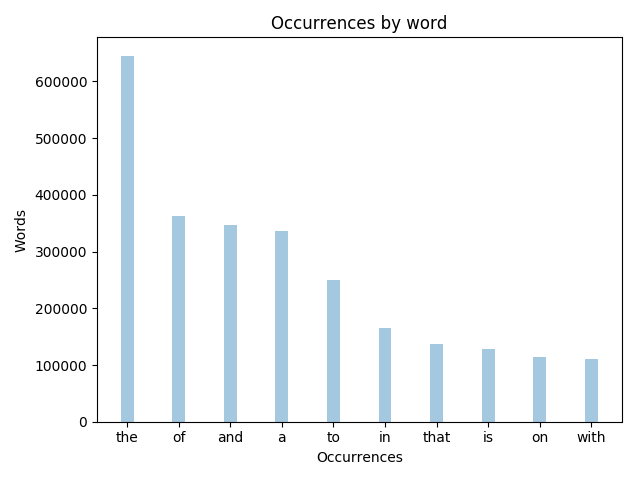

In [24]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

freq_words = Counter(" ".join(df["cleaned_content"]).split()).most_common(100)

data = freq_words[:10]

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]


index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='tab:blue',
                 label='Ocurrences')
plt.figure(1)
plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word')
plt.xticks(index, legends_films)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


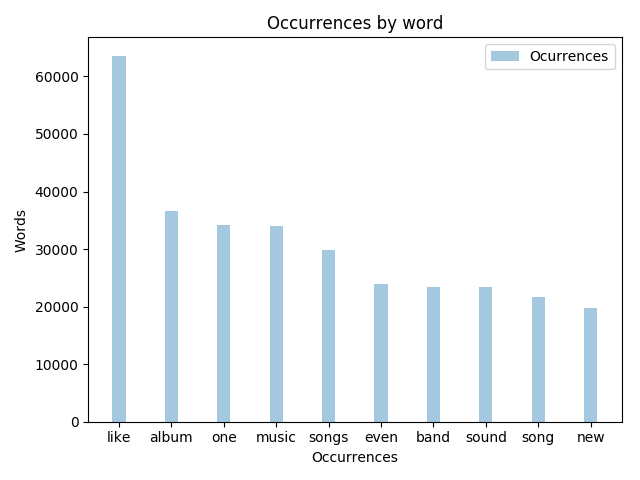

In [25]:
content_without_stopwords = df['cleaned_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))    

freq_words = Counter(" ".join(content_without_stopwords).split()).most_common(100)
data = freq_words[:10]

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='tab:blue',
                 label='Ocurrences')
plt.figure(2)
plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word')
plt.xticks(index, legends_films)
plt.legend()

plt.tight_layout()
plt.show()

{0: 18, 1: 24, 2: 121, 3: 214, 4: 565, 5: 999, 6: 3171, 7: 5635, 8: 6509, 9: 954, 10: 168}


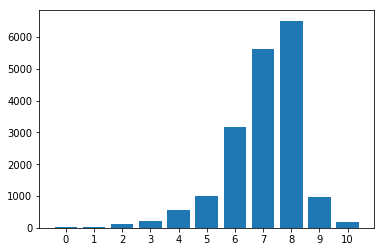

In [22]:
reviews_scores = df.score.apply(np.around).astype(int).sort_values()

freq_scores = dict(Counter(reviews_scores))
print(freq_scores)



n_groups = len(freq_scores)

plt.figure(3)
plt.bar(range(n_groups), list(freq_scores.values()), align='center')
plt.xticks(range(n_groups), list(freq_scores.keys()))

plt.show()

# Vectorization

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    emb = count_vectorizer.fit_transform(data)

    return emb

list_corpus = df["cleaned_content"].values
list_labels = df["score"].apply(np.around).astype(int).values
data = cv(list_corpus)

X_train, X_test, y_train, y_test = train_test_split(data, list_labels, test_size=0.2, 
                                                                                random_state=40)


# TSNE

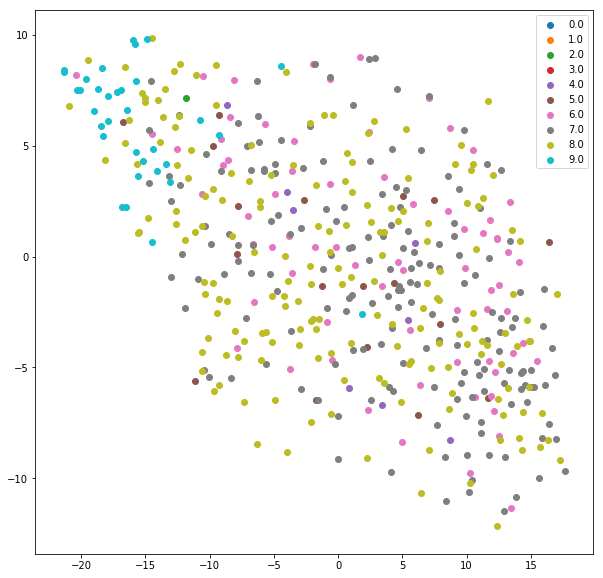

In [17]:

%matplotlib inline

import pandas as pd
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


vector = CountVectorizer().fit(df.cleaned_content[:500])
X = vector.transform(df.cleaned_content[:500])

y = df['score'].apply(np.around).head(500)
y = y.values

tsne = TSNE(n_components=2, random_state=0)

X_2d = tsne.fit_transform(X.toarray())
target_ids = range(len((df.score.apply(np.around).unique())))
a = [i for i in df.score.apply(np.around).unique()]
a.sort()
a = list(map(str, a))
colors = 'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'

plt.figure(figsize=(10, 10))
for i, c, label in zip(target_ids, colors, tuple(a)):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()


# Classification

## Function to calculate metrics

In [33]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = 0#f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

## Multinomial Naive Bayes

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

print(y_train.shape)
print(X_train.shape)
b = np.array([list(y_train).count(i)/len(list(y_train)) for i in set(list(y_train))])
print(b)
nb = MultinomialNB(class_prior=b).fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

import pandas as pd
y_actu = pd.Series(y_test, name='Actual')
a = nb.predict(X_test)
print(a)
y_pred = pd.Series( nb.predict(X_test), name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

print("Naive Bayes")
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

(14702,)
(14702, 258562)
[0.00108829 0.00142838 0.00618963 0.01231125 0.03074412 0.0533941
 0.17174534 0.30506054 0.35525779 0.05312202 0.00965855]
[8 7 8 ... 7 8 8]
Predicted   6    7     8  9
Actual                     
0           1    0     1  0
1           1    1     1  0
2           2   16    12  0
3           2    9    22  0
4          13   51    49  0
5          14   97   103  0
6          20  270   356  0
7          10  389   751  0
8           6  227  1052  1
9           0   11   162  0
10          0    0    26  0
Naive Bayes
accuracy = 0.397, precision = 0.310, recall = 0.397, f1 = 0.000


/home/joaorobson/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Bernoulli Naive Bayes

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

print(y_train)
b = np.array([list(y_train).count(i)/len(list(y_train)) for i in set(list(y_train))])
print(b)
nb = BernoulliNB().fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

import pandas as pd
y_actu = pd.Series(y_test, name='Actual')
a = nb.predict(X_test)
print(a)
y_pred = pd.Series( nb.predict(X_test), name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

print("Naive Bayes")
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

[6 8 7 ... 8 8 7]
[0.00108829 0.00142838 0.00618963 0.01231125 0.03074412 0.0533941
 0.17174534 0.30506054 0.35525779 0.05312202 0.00965855]


/home/joaorobson/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[7 8 7 ... 8 8 7]
Predicted  6    7    8  9
Actual                   
0          0    1    1  0
1          1    1    1  0
2          1   22    7  0
3          0   18   15  0
4          1   77   35  0
5          1  147   65  1
6          4  411  231  0
7          0  644  506  0
8          3  428  848  7
9          0   18  149  6
10         0    0   21  5
Naive Bayes
accuracy = 0.409, precision = 0.351, recall = 0.409, f1 = 0.000


## Logistic Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

def cv(data):
    emb = count_vectorizer.fit_transform(data)

    return emb

list_corpus = df["cleaned_content"].values
list_labels = df["score"].apply(np.around).astype(int).values
data = cv(list_corpus)
X_train, X_test, y_train, y_test = train_test_split(data, list_labels, test_size=0.2, 
                                                                                random_state=40)

for c in [0.01, 0.05, 0.25, 0.5, 1, 5, 10, 50]:
    
    clf = LogisticRegression(C=c, class_weight='balanced', solver='liblinear', 
                         multi_class='auto', random_state=42)
    clf.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, clf.predict(X_test))))


Accuracy for C=0.01: 0.41077257889009794
Accuracy for C=0.05: 0.40968443960826983
Accuracy for C=0.25: 0.4061479869423286
Accuracy for C=0.5: 0.4020674646354733
Accuracy for C=1: 0.40070729053318827
Accuracy for C=5: 0.397170837867247
Accuracy for C=10: 0.39662676822633297
Accuracy for C=50: 0.39907508161044614


[[ 532 1456]
 [ 135  419]
 [ 235  597]
 ...
 [ 338  846]
 [ 128  390]
 [ 119  301]]


In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, clf.predict(X_test))

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.399, precision = 0.378, recall = 0.399, f1 = 0.385
